In [127]:
import pandas as pd

from aicentro.session import Session
session = Session(verify=False)

import tensorflow as tf
import numpy as np
from tensorflow.python import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.optimizers import RMSprop, Adagrad

In [4]:
voc_df = pd.read_csv('voc_final_20200723.csv')

In [5]:
!pip install JPype1
!pip install konlpy

Looking in indexes: http://aicentro-nexus-svc:8081/hub-nexus/repository/pypi-group/simple
You should consider upgrading via the 'pip install --upgrade pip' command.
Looking in indexes: http://aicentro-nexus-svc:8081/hub-nexus/repository/pypi-group/simple
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
# # 데이터를 읽고 순서를 섞는다
voc_model_df=voc_df.sample(frac=1).reset_index(drop=True)
del voc_model_df['Unnamed: 0']
voc_model_df

,상담+AS,상담,AS,급지,상품구분,rscs_yn
0,고객불만영업영업점불만없음없음AS처리유형,고객불만영업영업점불만,없음없음AS처리유형,5,위성,False
1,고객불만영업영업점불만영상 불량리모콘사용법 미숙지AS처리유형,고객불만영업영업점불만,영상 불량리모콘사용법 미숙지AS처리유형,2,위성,False
2,고객불만영업영업점불만없음없음AS처리유형,고객불만영업영업점불만,없음없음AS처리유형,4,위성,True
3,서비스 문의 및 신청서비스 신청SkyChoice없음없음AS처리유형,서비스 문의 및 신청서비스 신청SkyChoice,없음없음AS처리유형,1,없음,False
4,고객불만설치(이전)/AS설치점불만영상 불량A/S취소AS처리유형,고객불만설치(이전)/AS설치점불만,영상 불량A/S취소AS처리유형,5,위성,False
...,...,...,...,...,...,...
40483,서비스 문의 및 신청서비스 신청패키지 추가없음없음AS처리유형,서비스 문의 및 신청서비스 신청패키지 추가,없음없음AS처리유형,2,없음,False
40484,고객불만 이관본사 전화민원해지없음없음AS처리유형,고객불만 이관본사 전화민원해지,없음없음AS처리유형,2,위성,False
40485,고객불만 이관본사 전화민원청구/환불없음없음AS처리유형,고객불만 이관본사 전화민원청구/환불,없음없음AS처리유형,2,위성,False
40486,고객불만 이관AS처리점 유발AS점 직원 불친절없음없음AS처리유형,고객불만 이관AS처리점 유발AS점 직원 불친절,없음없음AS처리유형,0,위성,False


In [ ]:
nlp_dic = []
#ll = [kkma.nouns(i) for i in voc_df['상담'].head(1000)]
def add_dic(s):
    global nlp_dic
    nlp_dic=list(set(nlp_dic+list(s)))
#     print(nlp_dic)
for i in voc_df['상담']:
    ii=set(kkma.nouns(i))
    add_dic(ii)
    
for i in voc_df['AS']:
    ii=set(kkma.nouns(i))
    add_dic(ii)
    
print('---')    
print(nlp_dic)

In [ ]:
import pickle
 
## Save pickle
with open("nlp_dic_2.pickle","wb") as fw:
    pickle.dump(nlp_dic, fw)

In [ ]:
## Load pickle
with open("nlp_dic_2.pickle","rb") as fr:
    data = pickle.load(fr)
nlp_dic = data    
print(nlp_dic)

In [9]:
nlp_dic = ['클레임', '칭찬기타동', '환경', '동축콘넥터', '환불', '발생수신기', '속도저하', '휴일', '중복발생수신기', '침해', '메시지일시적', '환불리모콘', '이관내방고객설치', '오연결', '회사', '단체방송품질', '불친절기타', '이행', '장비', '이관소비자보호원영업', '동작불가잭', '연결', '파전환방법', '공', '이관기타', '전화민원방송품질', '불', '기타동', '불량자상파전환방법', '기정통부해지', '유통망관련', '이관소비자신문기타', '스마트', '미흡영상', '미이행기타', '영업점불만', '구내', '이관소비자보호원해지', '연맹', '지연영상', '시청불가', '주부클럽연합회', '절', '단체영상', '청구', '신호미약', '환불신호미약', '전화민원영업영상', '모임명의도용', '통신', '녹화', '미동작리모콘사용법', '메시지동작불가', '연결요청', '미이행', '수신', '제도', '민원', '위험지역', '미이행영상', '메시지리모콘', '임의개통', '모임방송', '연결요청리모콘사용법', '메시지불량', '점불만', '영상불량', '단체이용불편', '비고장', '정책', '불만기타', '신청패키지', '단체방송품질수신기', '해지', '미지금', '기정', '임의', '중복발생신호미약', '점불만재해지역', '점불만수신기', '미동작리모콘', '시청불가음성', '단체재해지역', '전화민원상담음성', '자연', '등', '모름회선', '영상불량기타리모콘', '정오', '분실스마트카드', '후', '보호원이용', '타스', '커넥터', '상담', '미흡기타', '방송품질수신기', '분실동축콘넥터', '가스', '구내단자함', '콘텐츠리모콘', '주의', '방문약속', '산', '지연', '이관소비자보호원청구', '고객부주의', '모름케이블연결방법', '메시지안테나', '메시지수신기', '이관대', '이관소비자신문영업', '영상', '불친절', '미동작동', '일방적가입', '단체기타동', '서비스', '모임해지영상', '클레임처리지연', '전원', '미', '패키지', '미이행수신기', '미흡케이블', '영업점', '특이', '명의', '내방', '설치점불만수신', '동갖불가', '미흡기타동축', '기정통부이용', '고객불만설치', '불친절기타리모콘사용법', '지연수신기', '미동작전', '놈파손', '개인정보', '미사용', '회복', '추가', '점검', '불만수신기', '사용법', '모임해지', '녹화방법', '가입해지', '미이행케이블', '해지음성', '전화민원상담리모콘', '미흡스마트카드', '미동작수신기', '카드', '전화민원해지수신', '정상', '전화민원해지수신기', '단체영업수신기', '타동', '네트워크', '이전', '미이행재해지역', '클럽', '가입', '오류', '불친절수신설비', '이용불편영상', '모름리모콘', '해지수신기', '백업', '불량동작', '공법', '작업', '취소', '콘', '사례', '분실파손', '주부클럽연합회기타', '모임영업영상', '작전', '단체이용불편영상', '단체기타수신기', '미흡기타전산', '쌍방향', '전화민원해지영상', '방송', '메시지파손', '약정안내', '분실수신설비', '메시지동', '메시지기타', '미동작스마트카드', '유통망', '미이행기타스마트', '도서', '놈지상파', '점불만스마트카드', '잡음증폭기', '품질', '놈리모콘', '취약', '단체해지기타', '놈동축콘넥터', '불량녹화방법', '모임청구', '불만', '메시지회선', '방문', '축콘넥터', '처리누락', '기타전산', '저하', '처리지연영상', '콘넥터', '불만영상', '환불영상', '기정통부해지영상', '피해', '확인', '분실리모콘', '처리지연기타전산', '동작불가스마트카드', '전화', '오', '단체기타', '전화민원영업기타', '손괴신호미', '고객요청', '전화민원콘텐츠', '미흡기타일시적', '방수처리', '모름', '일방적', '불만리모콘', '분식', '납', '불량동', '기타일시적', '메시지전원', '증폭기', '점불만음성', '기정통부해지기타', '모름파손', '기타', '불량설치관련', '음성불량음성', '시청불가영상', '신호', '놈', '처리지연케이블', '메시지취약지역', '모름안테나', '기정통부해지음성', '환불재해지역', '짐', '메시지도시가스배관', '처리', '콘텐츠', '불량리모콘', '비고', '미약', '소비자연맹방송', '불가', '지금', '전환', '점불만인터넷', '고객사유', '사용', '환불스마트카드', '관련', '메시지자상파전환', '놈케이블연결방법', '분실케이블연결방법', '불만기타안테나', '주부클럽연합회콘텐츠', '단체방송품질기타', '단체음성', '유발', '모름동', '요청', '불가리모콘사용법', '방송품질영상', '전화민원해지신호', '분실전산', '세대', '영업업셀링', '공사', '단체상담', '불량리모콘사용법', '품질리모콘', '전화민원영업', '제품', '전화민원영업케이블', '분실', '메시지케이블연결방법', '단체리모콘', '복구', '미이행기타수신기', '미흡수신설비', '전화민원해지', '가격', '영업수신설비', '인터넷', '분배', '시민', '품질수신장애', '도서지역', '허브', '단체스마트카드', '셀', '처리지연스마트카드', '설치기사', '동작불가리모콘', '이용불편', '설치점불만케이블', '미이행수신설비', '전화민원상담케이블', '불만음성', '영업', '단선', '불량자', '이관소비자연맹청구', '지연기타수신기', '분실일시적', '전화민원기타', '영업수신기', '품질음성', '영업영상', '처리점', '사용불가', '전화민원청구', '설치지연', '동작불가파손', '불친절음성', '모임해지수신기', '모임가격정책', '환불음성', '불편리', '단체해지수신기', '점불만기타동', '케이블', '미흡기타안테나', '해지신호미약', '동축', '불량안테나', '이관내방고객가격', '방송품질', '안됨', '잭', '포트', '불가파손', '단체영업기타', '상파', '불친절기타스마트카드', '미동작일시적', '미흡기타케이블연결', '리모콘', '정상확인', '영업리모콘', '점불만신호미약', '단체설치', '놈수신기', '접', '소비자연맹', '결합', '포트불량', '동갖', '출동지연', '제조사', '단체수신설비', '타임머신', '동작불가신호', '영상불량케이블', '기정통부설치', '불편영상', '모뎀', '위원회', '손괴', '처리지연신호미약', '모', '공법불량', '분실녹화방법', '주부', '준수', '모름일시적', '동작불가수신기', '점검리모콘사용법', '축', '동작불가전산', '발생리모콘사용법', '수신설비', '리모콘리모콘', '점불만실버리모콘', '문의', '주부클럽연합회방송', '기정통부상담리모콘', '불량동축콘넥터', '마트', '플레이어', '미흡기타리모콘사용법', '환불기타일시적', '수신기', '불가녹화방법', '영업점불만기타', '전화민원해지기타', '설치', '지상파', '이행기', '단체청구', '호', '문의고객센터', '이관소비자연맹해지', '동작', '공유기', '신청기업', '분실수신기', '불친절기타안테나', '약속', '주부클럽연합회설치', '설치관련', '유니트', '기정통부방송', '미숙지', '기타리모콘사용법', '불량해상도', '메시지공유기', '설치점불만리모콘', '놈스마트카드', '고장', '배관', '미이행음성', '기타메시지기타', '설치점불만영상', '미이행신호미', '불만신호미', '문의기사칭찬', '분실리모콘사용법', '손괴재해지역', '기정통부이용불편', '방송품질기타', '볼트', '미이행기타안테나', '메시지가스배관', '접불', '이관내방고객영업', '단체영업', '일시적', '회선', '공급', '미동작자상파전환', '기정통부', '신청서비스', '처리지연기타', '입선', '환불수신기', '메시지리모콘사용법', '채널', '방법', '개통', '놈동', '점', '영업점불만케이블', '기타설치관련', '기타파손', '동작불가설치관련', '이용', '보호원설치', '이중가입', '단체', '불만기타수신기', '미흡기타동', '모임상담', '네트워크장비장애', '메시지동작', '해상도', '불친절인터넷', '정보', '장', '미동작', '동작불가동축', '칭찬기타', '지연신호미약', '단체이용불편리모', '출동', '전화민원가격정책', '놈일시적', '이관소비자연맹설치', '점불만기타일시적', '지연기타리모콘사용법', '단체기타공유기', '영업케이블', '단체영업영상', '지연음성', '지역', '리모콘사용법', '주부클럽연합회해지', '불량파손', '불량불량', '불량', '연결확인', '사은품', '동작불가', '호전환해지', '전화민원상담', '동작자', '기술상담', '불만기타리모콘사용법', '메시지접속불량', '커넥터불량', '시설', '기타케이블연결방법', '고장불량', '유형', '동작불가안테나', '모름리모콘사용법', '불친절재해지역', '주부클럽연합회청구', '재해지역', '손괴영상', '해지기타', '불만케이블', '기정통부가격정책', '설치점불만음성', '앙카', '불친절신호미', '작동', '소비자', '발생안테나', '모임해지신호미약', '기', '소비자보호원', '미작동수신기', '단체해지음성', '주부클럽연합회가격', '불친절영상', '미흡인터넷', '불가안테나', '미이행기타리모콘', '품질기타', '모름동축콘넥터', '약속미이행', '놈설치관련', '설치점불만', '기업', '약정', '단체인터넷', '직원', '단자함', '민원영업', '단체영업리모콘', '미동작안테나', '고객취소', '재해', '칭찬리모콘', '미흡수신기', '분실안테나', '침해신호미', '놈동작', '메시지동축콘넥터', '처리지연음성', '민원방송', '이관방송통신위원회', '단체기타전산', '동', '동작동', '약속미준수', '신문', '입광', '모임이용', '누락', '불친절수신기', '설치점불만기타', '단체해지신호미', '보호원', '불량기타', '모임', '신청쌍방향', '기타수신기', '중복발생영상', '센터', '시청', '점불만영상', '이관소비자신문청구', '후처리', '업그레이드안됨수신기', '기정통부영업', '소비자연맹해지', '환불케이블', '처리지연', '처리지연리모콘', '환경설정오', '설', '이관내방고객청구', '불만기', '이관시민', '불량일시적', '이중', '시설노후', '불편', '불친절리모콘', '놈자상파전환', '실내선', '모임개인정보', '동작불가일시적', '대', '미이행인터넷', '처리유형', '방향', '통부', '이관본사', '영업상품', '이용불편기타', '케이블연결방법', '시청불가기타', '기정통부청구', '점불만기타수신기', '절연불량', '이관소비자신문해지', '이관소비자연맹콘텐츠', '전화민원설치', '메시지녹화방법', '분실동', '상담신호미약', '칭찬수신기', '발생', '도시', '전화민원콘텐츠영상', '신호미', '중복발생기타', '업그레이드', '대필', '점불만기타', '동작불가녹화방법', '문의기사', '처리지연기타수신기', '세대단자함', '콘텐츠수신기', '연결안됨', '연합회', '영업사은품', '민원상담', '모름설치관련', '품질수신기', '모임방송품질', '단체콘텐츠', '실버', '불만기타파손', '잡음', '단체가격정책', '처리지연인터넷', '분리', '이관소비자보호원기타', '환불기타설치관련', '단체방송', '케이', '정통부', '미흡리모콘', '미동작케이블연결', '위험', '안테나', '칭찬', '지연리모콘', '불만기타동', '접수', '점불만기타안테나', '정비', '주부클럽', '속도', '신호미약수신기', '체계', '점불만리모콘', '미이행기타전산', '연', '불편수신설비', '해지기타리모콘사용법', '부', '명의도용', '놈녹화방법', '전화민원상담영상', '환불수신설비', '미흡', '불친절케이블', '비용', '처리지연수신설비', '불복구', '안내', '해지영상', '점불만기타파손', '모름전산', '불친절스마트카드', '숙지', '기타안테나', '처리지연기타리모콘', '불친절기타파손', '개인', '불편수신기', '단체방송품질영상', '신청', '파', '중복', '동작불가동', '접속불량', '파손', '영업가', '단체클레임처리지연', '변경', '발생일시적', '해지기타수신기', '불편기타', '오처리', '불만기타전산', '점불만기타리모콘', '설치점', '이관소비자연맹가격', '놈신호', '미이행모뎀', '전화민원이용불편', '놈안테나', '단체영업인터넷', '채널설정방법', '연결방법', '기사', '미동작파손', '실버리모콘리모콘', '단체케이블', '환불기타수신기', '처리지연수신기', '전원공급', '사용미숙', '신호미약기타', '미동', '요금', '방수', '미숙', '영업기타', '음성', '불만수신설비', '메시지설치관련', '메시지스마트카드', '처리지연기타동', '메시지신호', '주부클럽연합회상담', '놈리모콘사용법', '놈해상도', '백업고객', '기술', '처리지연기타안테나', '설비', '단체수신기', '전화민원해지음성', '불량접속불량', '이관소비자연맹영업', '모름수신기', '환불기타', '불가전산', '놈전산', '미흡음성', '장애', '특이사례', '모임영업', '모임해지기타', '자상', '스마트카드', '영업기타수신기', '단체방송품질리모콘', '미이행리모콘', '칭찬케이블', '앙카볼트', '이관소비자보호원가격', '불량케이블연결방법', '불량동작불가', '불량전산', '단체신호미', '점불만수신설비', '이관소비자연맹기타', '유발고객재산', '불량수신기', '미흡신호미', '단체이용', '미이행스마트카드', '불가수신기', '전산', '전', '업', '폐문', '본사', '영업가전결합', '비용불만', '미이행네트워크', '미이행기타파손', '재산', '이관', '설치점불만수신기', '불편음성', '입', '소비자연맹이용', '고객', '메시지전산', '노후', '제품불량', '단체해지', '지연기타', '불편리모콘', '영상불량영상', '주부클럽연합회영업', '기정통부기타', '연합회해지수신기', '고객불만', '불편기타수신기', '기정통부상담', '영업음성', '유기', '환불기타리모콘사용법', '가입자', '상품', '모름스마트카드', '주부클럽연합회이용', '품질영상', '민원이용', '자연회복', '가격정책', '불량신호', '사유', '링', '중복발생', '연결요청수신기', '단체기타리모콘사용법', '미흡기타수신기', '설정', '미흡기타파손', '점불만모뎀', '모임설치', '점불만기타동축', '단체해지영상', '점불만케이블', '미흡재해지역', '도용', '광', '모임해지기타수신기', '접속', '메시지']

In [196]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
#transformer = TfidfTransformer(smooth_idf=False)  #IDF값의 분모와 분자에 1을 더하는 인수
#transformer = TfidfTransformer(use_idf=True)
#transformer = TfidfTransformer(sublinear_tf=True)
transformer = TfidfTransformer(sublinear_tf=True, smooth_idf=False)

In [70]:
from konlpy.tag import *

corpus = nlp_dic
s=".".join(corpus)

print(s)
# posToUse=["NNP","NNG","MAG","NP","VV","VV+EF"]
posToUse=["NNG"]

클레임.칭찬기타동.환경.동축콘넥터.환불.발생수신기.속도저하.휴일.중복발생수신기.침해.메시지일시적.환불리모콘.이관내방고객설치.오연결.회사.단체방송품질.불친절기타.이행.장비.이관소비자보호원영업.동작불가잭.연결.파전환방법.공.이관기타.전화민원방송품질.불.기타동.불량자상파전환방법.기정통부해지.유통망관련.이관소비자신문기타.스마트.미흡영상.미이행기타.영업점불만.구내.이관소비자보호원해지.연맹.지연영상.시청불가.주부클럽연합회.절.단체영상.청구.신호미약.환불신호미약.전화민원영업영상.모임명의도용.통신.녹화.미동작리모콘사용법.메시지동작불가.연결요청.미이행.수신.제도.민원.위험지역.미이행영상.메시지리모콘.임의개통.모임방송.연결요청리모콘사용법.메시지불량.점불만.영상불량.단체이용불편.비고장.정책.불만기타.신청패키지.단체방송품질수신기.해지.미지금.기정.임의.중복발생신호미약.점불만재해지역.점불만수신기.미동작리모콘.시청불가음성.단체재해지역.전화민원상담음성.자연.등.모름회선.영상불량기타리모콘.정오.분실스마트카드.후.보호원이용.타스.커넥터.상담.미흡기타.방송품질수신기.분실동축콘넥터.가스.구내단자함.콘텐츠리모콘.주의.방문약속.산.지연.이관소비자보호원청구.고객부주의.모름케이블연결방법.메시지안테나.메시지수신기.이관대.이관소비자신문영업.영상.불친절.미동작동.일방적가입.단체기타동.서비스.모임해지영상.클레임처리지연.전원.미.패키지.미이행수신기.미흡케이블.영업점.특이.명의.내방.설치점불만수신.동갖불가.미흡기타동축.기정통부이용.고객불만설치.불친절기타리모콘사용법.지연수신기.미동작전.놈파손.개인정보.미사용.회복.추가.점검.불만수신기.사용법.모임해지.녹화방법.가입해지.미이행케이블.해지음성.전화민원상담리모콘.미흡스마트카드.미동작수신기.카드.전화민원해지수신.정상.전화민원해지수신기.단체영업수신기.타동.네트워크.이전.미이행재해지역.클럽.가입.오류.불친절수신설비.이용불편영상.모름리모콘.해지수신기.백업.불량동작.공법.작업.취소.콘.사례.분실파손.주부클럽연합회기타.모임영업영상.작전.단체이용불편영상.단체기타수신기.미흡기타전산.

In [71]:
def getTokens(s):
    global posToUse
    return " ".join([ i[0] for i in  Mecab().pos(s) if i[1] in posToUse ] )
    
getTokens(s)

'클레임 찬기 타동 환경 콘 넥 터 환불 발생 수신기 속도 저하 휴일 중복 발생 수신기 침 메시지 일시 환불 콘 내방고 객설 연결 회사 단체 방송 품질 불친절 기타 장비 관소 자보 호원 영업 동작 불가 잭 연결 파 전환 방법 공 전화 민원 방송 품질 불 타동 불량자 상파 전환 방법 정통부 유통망 관련 소비자 신문 기타 스마트 미흡 영상 영업 점 불만 구내 소비자 보호 원해 연맹 지연 영상 시청 불가 주부 클럽 연합회 절 단체 영상 신호 미약 환불 신호 미약 전화 민원 영업 영상 모임 명의 도용 통신 녹화 미동 작리 콘 사용법 메시지 동작 불가 연결 요청 수신 제도 민원 위험 지역 메시지 콘 임의 개통 모임 방송 연결 요청 콘 사용법 메시지 불량 점 불만 영상 불량 단체 이용 불편 고장 정책 불만 기타 신청 패키지 단체 방송 품질 수신기 미 기정 임의 중복 발생 신호 미약 점 만재 지역 점 불만 수신기 미동 작리 콘 시청 불가 음성 단체 재해 지역 전화 민원 상담 음성 자연 모름 회선 영상 불량 기타 콘 정오 분실 스마트카드 후 보호 원 커넥터 상담 미흡 기타 방송 품질 수신기 분실 콘 넥 터 가스 구내 단자함 콘텐츠 콘 주의 방문 약속 산 지연 관소 자보 객부 주의 모름 케이블 연결 방법 메시지 안테나 메시지 수신기 소비자 신문 영업 영상 불친절 미동 작동 일방 가입 단체기 타동 서비스 모임 지영 클레임 처리 지연 전원 미 패키지 미흡 케이블 영업 점 특이 명의 설치 점 불만 수신 갖 불가 미흡 기타 정통부 고객 불만 설치 불친절 기타 콘 사용법 미동 작전 파손 개인 정보 사용 회복 추가 점검 불만 수신기 사용법 모임 녹화 방법 가입 전화 민원 상담 콘 미흡 스마트카드 동작 수신기 카드 전화 민원 정상 전화 민원 지수 단체 영업 수신기 타동 네트워크 이전 이행 재해 지역 클럽 가입 오류 불친절 수신 설비 이용 불편 영상 모름 콘 해지 수신기 백업 불량 동작 공법 작업 취소 콘 사례 분실 파손 주부 클럽 연합회 기타 모임 영업 영상 작전 단체 이용 불편 영상 단

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit([getTokens(s)])

CountVectorizer()

In [74]:
cnslt_array = vect.transform([getTokens(i) for i in voc_model_df['상담']]).toarray()

tfidf = transformer.fit_transform(cnslt_array)
cnslt_array=tfidf.toarray()
cnslt_array.shape

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1447: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1


(40488, 240)

In [75]:
cnslt_df = pd.DataFrame(cnslt_array)
cnslt_df.head(333).tail(100)

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
cnslt_df[cnslt_df[3]!=0]

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
9,0.0,0.0,0.0,0.442416,0.0,0.0,0.0,0.0,0.436704,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.0,0.442416,0.0,0.0,0.0,0.0,0.436704,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,0.0,0.0,0.0,0.442585,0.0,0.0,0.0,0.0,0.436871,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.0,0.0,0.0,0.442416,0.0,0.0,0.0,0.0,0.436704,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.442585,0.0,0.0,0.0,0.0,0.436871,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40330,0.0,0.0,0.0,0.442585,0.0,0.0,0.0,0.0,0.436871,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40342,0.0,0.0,0.0,0.442585,0.0,0.0,0.0,0.0,0.436871,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40393,0.0,0.0,0.0,0.442585,0.0,0.0,0.0,0.0,0.436871,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40427,0.0,0.0,0.0,0.442416,0.0,0.0,0.0,0.0,0.436704,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
as_array = vect.transform([getTokens(i) for i in voc_df['AS']]).toarray()

tfidf = transformer.fit_transform(as_array)
as_array=tfidf.toarray()
# as_array.shape


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1447: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1


(40488, 240)

In [78]:
as_df = pd.DataFrame(as_array)
as_df.columns=[100000+i for i in as_df.columns]
as_df.head(333).tail(100)

,100000,100001,100002,100003,100004,100005,100006,100007,100008,100009,...,100230,100231,100232,100233,100234,100235,100236,100237,100238,100239
233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
print(as_df[as_df[100230]!=0].head(1))

      100000  100001  100002  100003  100004  100005  100006  100007  100008  \
2139     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      100009  ...    100230  100231  100232  100233  100234  100235  100236  \
2139     0.0  ...  0.700487     0.0     0.0     0.0     0.0     0.0     0.0   

      100237  100238  100239  
2139     0.0     0.0     0.0  

[1 rows x 240 columns]


In [80]:
#pd.concat(voc_nlp_df,as_df)
voc_final_df = pd.concat([as_df, cnslt_df,voc_df], axis=1)
voc_final_df

,100000,100001,100002,100003,100004,100005,100006,100007,100008,100009,...,237,238,239,Unnamed: 0,상담+AS,상담,AS,급지,상품구분,rscs_yn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,서비스 문의 및 신청서비스 신청SkyChoice없음없음AS처리유형,서비스 문의 및 신청서비스 신청SkyChoice,없음없음AS처리유형,4,없음,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,서비스 문의 및 신청서비스 신청SkyChoice없음없음AS처리유형,서비스 문의 및 신청서비스 신청SkyChoice,없음없음AS처리유형,5,없음,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,서비스 문의 및 신청서비스 신청SkyChoice없음없음AS처리유형,서비스 문의 및 신청서비스 신청SkyChoice,없음없음AS처리유형,3,없음,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,고객불만설치(이전)/AS잦은 AS수신기 동작불가수신기 전원 동작불가AS처리유형,고객불만설치(이전)/AS잦은 AS,수신기 동작불가수신기 전원 동작불가AS처리유형,2,위성,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4,서비스 문의 및 신청서비스 신청SkyChoice없음없음AS처리유형,서비스 문의 및 신청서비스 신청SkyChoice,없음없음AS처리유형,4,없음,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,40483,고객불만영업영업점불만(임의개통_이중가입)없음없음AS처리유형,고객불만영업영업점불만(임의개통_이중가입),없음없음AS처리유형,5,위성,False
40484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,40484,고객불만영업상품/약정안내 미흡없음없음AS처리유형,고객불만영업상품/약정안내 미흡,없음없음AS처리유형,3,위성,False
40485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,40485,고객불만 이관대한주부클럽연합회영업없음없음AS처리유형,고객불만 이관대한주부클럽연합회영업,없음없음AS처리유형,4,위성,False
40486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,40486,고객불만영업영업점불만(임의개통_일방적가입)없음없음AS처리유형,고객불만영업영업점불만(임의개통_일방적가입),없음없음AS처리유형,7,위성,False


In [81]:
del voc_final_df['Unnamed: 0']
del voc_final_df['상품구분']
del voc_final_df['상담+AS']
del voc_final_df['상담']
del voc_final_df['AS']
voc_final_df

,100000,100001,100002,100003,100004,100005,100006,100007,100008,100009,...,232,233,234,235,236,237,238,239,급지,rscs_yn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,False
40484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,False
40485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.526502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,False
40486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,False


In [180]:
voc_train=voc_final_df.iloc[0:20000,:]
voc_test=voc_final_df.iloc[20000:40488,:]

In [181]:
x_train= voc_train.iloc[:,0:481].values
x_test= voc_test.iloc[:,0:481].values
y_train= voc_train.iloc[:,481:482]
y_test= voc_test.iloc[:,481:482]

In [182]:
test_df = voc_final_df[voc_final_df['rscs_yn']!=True]

In [183]:
test_df[test_df['rscs_yn']!=False] 

,100000,100001,100002,100003,100004,100005,100006,100007,100008,100009,...,232,233,234,235,236,237,238,239,급지,rscs_yn


In [184]:
# encoder={k:v for v,k in enumerate(y_train.drop_duplicates())}
# encoder
sets=voc_final_df.iloc[:,481:482].drop_duplicates()["rscs_yn"].tolist()

In [185]:
encoder={k:v for v,k in enumerate(sets)}

In [186]:
y_train=[ encoder[i] for i in y_train["rscs_yn"].tolist() ]

In [187]:
batch_size = 50
num_classes = 2
epochs = 50

In [188]:
y_train = keras.utils.to_categorical(y_train, num_classes)

y_test=[ encoder[i] for i in y_test["rscs_yn"].tolist() ]
y_test = keras.utils.to_categorical(y_test, num_classes)

In [189]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [190]:
# 데이터 shape 을 확인해 봅니다.
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(20000, 481) (20000, 2) (20488, 481) (20488, 2)


In [191]:
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(481,)))
model.add(Dropout(0.4))
model.add(Dense(20, activation='tanh',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(5, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
#'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=Adagrad(0.01),
              metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 400)               192800    
_________________________________________________________________
dropout_59 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 20)                8020      
_________________________________________________________________
dropout_60 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 5)                 105       
_________________________________________________________________
dropout_61 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_80 (Dense)             (None, 2)               

In [192]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [193]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 20000 samples, validate on 20488 samples
Epoch 1/50
20000/20000 [==============================] - 3s 160us/sample - loss: 0.5324 - acc: 0.8421 - val_loss: 0.4897 - val_acc: 0.8322
Epoch 2/50
20000/20000 [==============================] - 2s 112us/sample - loss: 0.4553 - acc: 0.8559 - val_loss: 0.4743 - val_acc: 0.8322
Epoch 3/50
20000/20000 [==============================] - 2s 119us/sample - loss: 0.4445 - acc: 0.8562 - val_loss: 0.4681 - val_acc: 0.8322
Epoch 4/50
20000/20000 [==============================] - 2s 112us/sample - loss: 0.4370 - acc: 0.8564 - val_loss: 0.4656 - val_acc: 0.8322
Epoch 5/50
20000/20000 [==============================] - 2s 114us/sample - loss: 0.4336 - acc: 0.8565 - val_loss: 0.4635 - val_acc: 0.8322
Epoch 6/50
20000/20000 [==============================] - 2s 116us/sample - loss: 0.4320 - acc: 0.8565 - val_loss: 0.4618 - val_acc: 0.8322
Epoch 7/50
20000/20000 [==============================] - 2s 119us/sample - loss: 0.4293 - acc: 0.8565 - val_l

In [195]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.45507058464005234
Test accuracy: 0.83224326


In [214]:
from aicentro.framework.keras import Keras as SacpFrm
sacp_framework = SacpFrm(session=session)

20488/20488 [==============================] - 0s 21us/sample


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


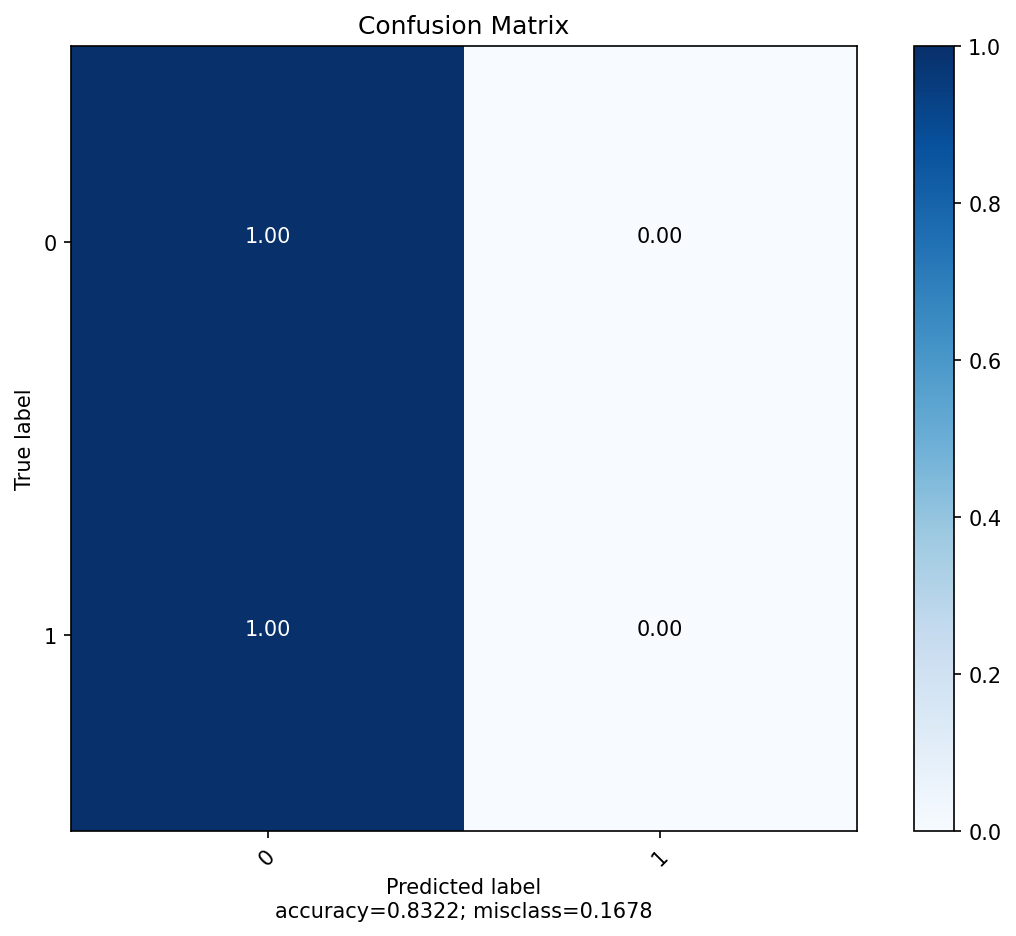

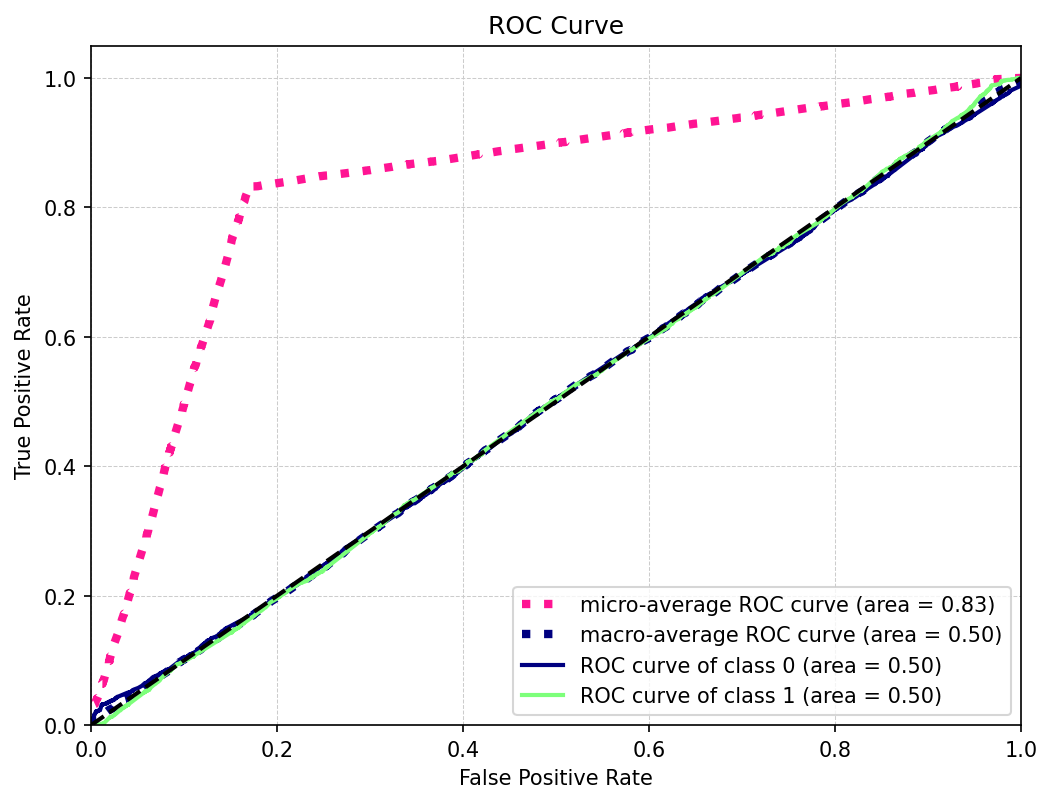

In [215]:
y_test_pred = model.predict(x_test, batch_size=128, verbose=1)
y_label = [0,1]

y_test_c = np.argmax(y_test, axis=1).reshape(-1, 1)
y_test_pred_c = np.argmax(y_test_pred, axis=1).reshape(-1, 1)

sacp_framework.plot_confusion_matrix(y_test_c, y_test_pred_c, target_names=y_label, title='Confusion Matrix')
sacp_framework.classification_report(y_test_c, y_test_pred_c, target_names=y_label)
sacp_framework.plot_roc_curve(y_test, y_test_pred, len(y_label), y_label)